In [1]:
%matplotlib inline  
import csv
import pandas as pd
import numpy as np
import sklearn
import scipy
from matplotlib import pyplot
from sklearn.linear_model import Ridge
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate

In [2]:
data1 = pd.read_csv('Aeroqual_CO_O3_timestamp.csv', sep = ',')
data2 = pd.read_csv('Photon_CO.csv', sep = ',')
a = data1.fillna(method= 'bfill',axis = 1)
data1['CO(ppm)'] = data1['CO(ppm)'].replace(' ', np.nan, regex=True)
data1['O3(ppm)'] = data1['O3(ppm)'].replace(' ', np.nan, regex=True)
data1 = data1.fillna(method= 'bfill',axis = 1)
x = data1['CO(ppm)'].values
x = x.astype(np.float)
y = data1['Timestamp'].values
#y = y.astype(np.float)
c = np.vander(y,15)
x2 = data2['CO(ppb)'].values
x2 = x2.astype(np.float)
y2 = data2['Timestamp'].values
#y2 = y2.astype(np.float)
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
x

array([0., 0., 0., ..., 0., 0., 0.])

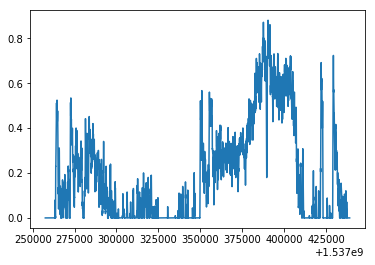

In [3]:
interpolation_function = InterpolatedUnivariateSpline(y,x)
new_y = np.linspace(data1['Timestamp'][0],data2['Timestamp'][data2['Timestamp'].index[-1]],data2['Timestamp'][data1['Timestamp'].index[-1]]- data1['Timestamp'][0])
new_x = interpolation_function(new_y)
for i in range(len(new_x)):
    if new_x[i]<0.00001:
        new_x[i]=0
np.savetxt('ab.csv', np.column_stack((new_y,new_x)), fmt='%d,%s')
pyplot.plot(new_y,new_x) 

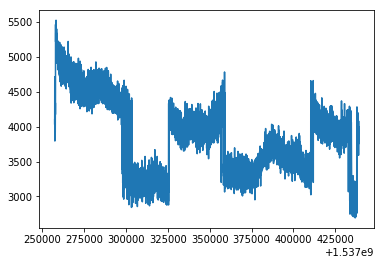

In [4]:
interpolation_function = InterpolatedUnivariateSpline(y2,x2)
new_y1 = np.linspace(data1['Timestamp'][0],data2['Timestamp'][data2['Timestamp'].index[-1]],data2['Timestamp'][data1['Timestamp'].index[-1]]- data1['Timestamp'][0])
new_x1 = interpolation_function(new_y1)
for i in range(len(new_x1)):
    if new_x1[i]<0.00001:
        new_x1[i]=0
np.savetxt('ab1.csv', np.column_stack((new_y1,new_x1)), fmt='%d,%s')
pyplot.plot(new_y1,new_x1) 

In [6]:
new_x = new_x.reshape(-1,1)
#new_x = pd.DataFrame(data=new_x[1:,1:],index =new_x[1:,0], columns=new_x[0,1:])  # 1st row as the column names
new_x1 = new_x1.reshape(-1,1)
#new_x1 = pd.DataFrame(data=new_x1[1:,1:],index =new_x1[1:,0], columns=new_x1[0,1:])  # 1st row as the column names
new = np.correlate(new_x, new_x1, mode='valid')
new = new.reshape(-1,1)
np.savetxt('ab1.csv', np.column_stack((new_x,new_x1,new)), fmt='%s,%s%s')

ValueError: object too deep for desired array